# How high are the modification costs to make a tour on a sparse grid full-covering?

Working on a sparser grid removes redundancies but also misses some areas (without modification).
Just visiting all vertices is no longer enough, but we present a modification routine in the paper that fixes this problem.
These modifications come at a cost, but how high is it on average?

We computed optimal TSP solutions in the grid for all benchmark instances and compared their lengths with the length after modification.
Computing these optimal solutions is NP-hard, but Concorde was able to do so solving the L1-TSP on the vertices that have to be visited.
The edges in L1 metric match the grid.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_json("./03_clean_data.json.zip")
# Convert polygons
import shapely.wkt
data["polygon"] = data["polygon"].apply(lambda p: shapely.wkt.loads(p))
data

,polygon,polygon_area,convex_hull_area,relative_area,instance_path,instance,instance_type,instance_type_simplified,grid_properties,small_tsp_path,...,lns_runtime,lns_is_optimal,lns_path_before_optimization,timelimit_mip,mip_path,mip_obj,mip_runtime,lb,ub,mip_path_before_optimization
0,"POLYGON ((30 38, 31 38, 31 37, 32 37, 32 35, 3...",220.000000,411.000000,523.301453,../instances/gen_aligned_small/gen_aligned_000...,gen_aligned_0000119.poly,gen_aligned,Polyominoes,"{'side_length': 1, 'min_x': 30.0, 'min_y': 12....","[[30.2121320344, 38.0922402258], [30.919238815...",...,300.242282,False,"[[52.5, 16.0], [52.382539916, 15.32196772], [5...",300,"[[52.5, 16.0], [52.382539916, 15.32196772], [5...",273.156828,300.287602,260.833728,273.156828,"[[52.5, 16.0], [52.382539916, 15.32196772], [5..."
1,"POLYGON ((12 53, 15 53, 15 51, 16 51, 16 52, 1...",171.000000,291.500000,371.149327,../instances/gen_aligned_small/gen_aligned_000...,gen_aligned_0000091.poly,gen_aligned,Polyominoes,"{'side_length': 1, 'min_x': 12.0, 'min_y': 43....","[[12.1414213562, 52.9702056147], [12.141421356...",...,300.172956,False,"[[25.5, 57.0], [25.5, 58.0], [25.5, 58.0], [25...",300,"[[25.5, 57.0], [25.5, 58.0], [25.5, 58.0], [25...",214.322266,300.175497,207.615177,214.322266,"[[25.5, 57.0], [25.5, 58.0], [25.5, 58.0], [25..."
2,"POLYGON ((50 43, 52 43, 52 44, 53 44, 53 42, 5...",24.000000,39.500000,50.292962,../instances/gen_aligned_small/gen_aligned_000...,gen_aligned_0000027.poly,gen_aligned,Polyominoes,"{'side_length': 1, 'min_x': 50.0, 'min_y': 40....","[[50.2121320344, 43.3234018716], [50.212132034...",...,300.045796,False,"[[53.5, 42.0], [53.5, 43.0], [53.5, 43.0], [53...",300,"[[53.5, 42.0], [53.5, 43.0], [53.5, 43.0], [53...",32.728914,300.061867,31.982352,32.728914,"[[53.5, 42.0], [53.5, 43.0], [53.5, 43.0], [53..."
3,"POLYGON ((44 49, 49 49, 49 47, 50 47, 50 48, 5...",24.000000,37.500000,47.746483,../instances/gen_aligned_small/gen_aligned_000...,gen_aligned_0000017.poly,gen_aligned,Polyominoes,"{'side_length': 1, 'min_x': 44.0, 'min_y': 47....","[[44.2121320344, 49.3334523779], [44.919238815...",...,300.159802,False,"[[48.0, 49.5], [48.67803228, 49.617460084], [4...",300,"[[48.0, 49.5], [48.67803228, 49.617460084], [4...",32.608536,300.075581,32.592864,32.608536,"[[48.0, 49.5], [48.67803228, 49.617460084], [4..."
4,"POLYGON ((37 20, 40 20, 40 22, 42 22, 42 24, 3...",18.000000,21.500000,27.374650,../instances/gen_aligned_small/gen_aligned_000...,gen_aligned_0000009.poly,gen_aligned,Polyominoes,"{'side_length': 1, 'min_x': 37.0, 'min_y': 20....","[[37.3535533906, 20.2121320344], [37.353553390...",...,0.119735,True,"[[37.5, 21.0], [37.5, 22.0], [37.5, 22.0], [37...",300,"[[38.5, 24.0], [38.3535533905, 23.3535533906],...",21.256543,0.024225,21.256543,21.256543,"[[38.5, 24.0], [38.3535533905, 23.3535533906],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,"POLYGON ((67 89, 70.889 89, 70.889 90.391, 72....",302.088850,663.700025,845.049118,../instances/srpg_iso_mc_small/srpg_iso_mc0000...,srpg_iso_mc0000230.poly,srpg_iso,Orthogonal Polygons,"{'side_length': 1, 'min_x': 67.0, 'min_y': 77....","[[67.2121320344, 88.9658657865], [67.919238815...",...,300.322078,False,"[[81.0, 85.235], [82.0, 85.235], [82.0, 85.235...",300,"[[81.0, 85.235], [82.0, 85.235], [82.0, 85.235...",522.219772,300.399144,504.183903,522.219772,"[[81.0, 85.235], [82.0, 85.235], [82.0, 85.235..."
323,"POLYGON ((19 33, 26.076 33, 26.076 32.234, 27....",142.730905,253.580125,322.868243,../instances/srpg_iso_mc_small/srpg_iso_mc0000...,srpg_iso_mc0000108.poly,srpg_iso,Orthogonal Polygons,"{'side_length': 1, 'min_x': 18.4, 'min_y': 23....","[[19.2828427125, 32.9908347648], [19.282842712...",...,300.137709,False,"[[20.9, 27.752], [20.9, 28.752], [20.9, 28.752...",300,"[[20.9, 27.752], [20.9, 28.752], [20.9, 28.752...",250.992367,300.154858,244.895268,250.992367,"[[20.9, 27.752], [20.9, 28.752], [20.9, 28.752..."
324,"POLYGON ((46 79, 46.991 79, 4

gen_aligned_0000103.poly
Dense TSP: 479.4183976445
Sparse TSP: 290
Modified sparse TSP: 348.5547918556
LNS: 330.6925973914
MIP: 330.6925973914


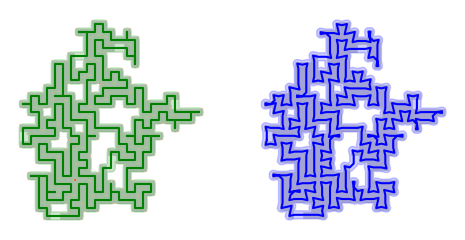

srpg_iso_aligned0000101.poly
Dense TSP: 267.4579361638
Sparse TSP: 164
Modified sparse TSP: 190.0261862947
LNS: 182.4438736929
MIP: 182.4438736929


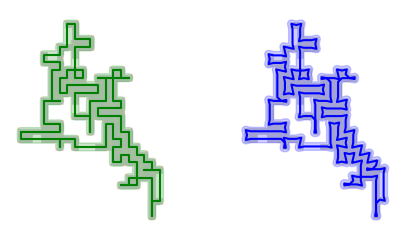

gen_aligned_0000029.poly
Dense TSP: 89.6812408671
Sparse TSP: 54
Modified sparse TSP: 64.3914782407
LNS: 61.8591308349
MIP: 61.8591308349


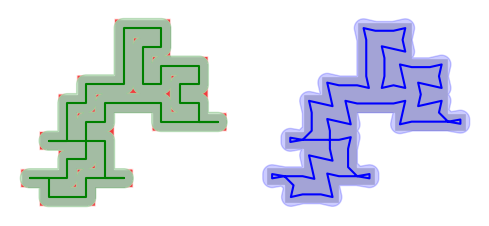

srpg_octa0000037.poly
Dense TSP: 82.9030662741
Sparse TSP: 54
Modified sparse TSP: 62.3900617719
LNS: 58.6607452215
MIP: 58.6607452215


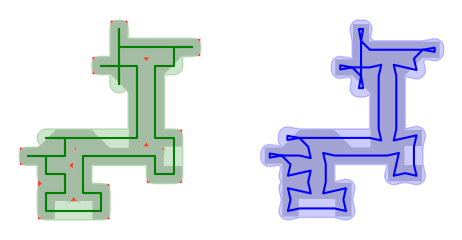

gen_aligned_0000125.poly
Dense TSP: 306.0559159102
Sparse TSP: 188
Modified sparse TSP: 218.5157613224
LNS: 213.604205243
MIP: 213.604205243


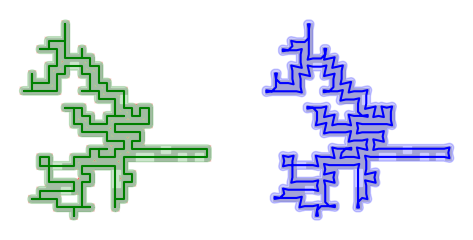

In [2]:
from puzzle_tour_solver.utils.plot_utils import PolygonPatch
import random
import matplotlib.pyplot as plt
for _ in range(5):
    example = data.iloc[random.randint(0, len(data))]
    print(example["instance"])
    print("Dense TSP:", example["small_tsp_obj"])
    print("Sparse TSP:", example["tsp_obj_grid_graph"])
    print("Modified sparse TSP:", example["tsp_obj"])
    print("LNS:", example["lns_obj"])
    print("MIP:", example["mip_obj"])
    fig, axes = plt.subplots(1, 2, figsize=(5,2.5))
    for tour, color, ax, full in [(example["tsp_path_grid_graph"], "green", axes[0], False), (example["tsp_path"], "blue", axes[1], True)]:
        polygon = example["polygon"]
        ax.add_patch(PolygonPatch(polygon.buffer(0), fc="#cccccc"))
        #ax.add_patch(PolygonPatch(LineString(solution["mip_path"]).buffer(1+1e-3), fc="#00ff0022", ec="#000"))
        if tour[0]!=tour[-1]:
            tour = tour+tour[:1]
        line = shapely.LineString(tour)
        covered_area = line.buffer(0.5)
        if not full:
            missing_area = polygon.difference(covered_area.buffer(0.01))
            for poly in missing_area.geoms:
                ax.add_patch(PolygonPatch(poly, fc="red", alpha=0.7))
            #ax.title("Before modification")
        ax.add_patch(PolygonPatch(covered_area.buffer(0.01), fc=color, ec=color, alpha=0.2))
        ax.plot([x for x, _ in tour], [y for _, y in tour], color=color)
        ax.autoscale_view()
        ax.set_aspect('equal')
        ax.axis('off')
    plt.tight_layout()
    plt.savefig(f"out/05_missing_area_examples/{example['instance'].split('.')[0]}.pdf")
    plt.show()

srpg_iso_aligned0000027.poly
Dense TSP: 83.6101730553
Sparse TSP: 52
Modified sparse TSP: 61.1109554802
LNS: 58.5638784587
MIP: 58.5311173816


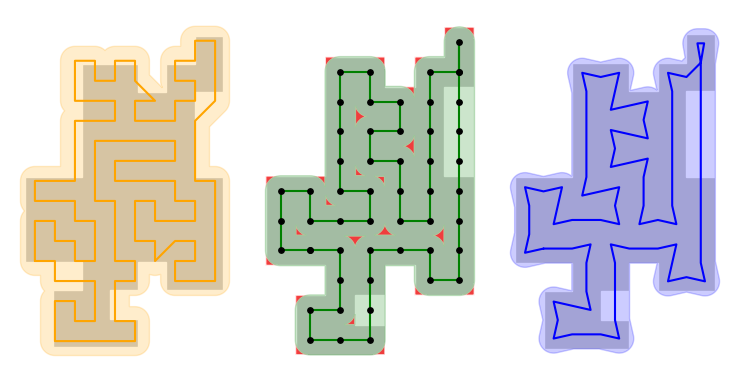

In [11]:
example = data[data["instance"]=="srpg_iso_aligned0000027.poly"].iloc[0]
print(example["instance"])
print("Dense TSP:", example["small_tsp_obj"])
print("Sparse TSP:", example["tsp_obj_grid_graph"])
print("Modified sparse TSP:", example["tsp_obj"])
print("LNS:", example["lns_obj"])
print("MIP:", example["mip_obj"])
fig, axes = plt.subplots(1, 3, figsize=(7.5,4))
for tour, color, ax, full in [(example["small_tsp_path"], "orange", axes[0], True),(example["tsp_path_grid_graph"], "green", axes[1], False), (example["tsp_path"], "blue", axes[2], True)]:
    polygon = example["polygon"]
    ax.add_patch(PolygonPatch(polygon.buffer(0), fc="#cccccc"))
    #ax.add_patch(PolygonPatch(LineString(solution["mip_path"]).buffer(1+1e-3), fc="#00ff0022", ec="#000"))
    if tour[0]!=tour[-1]:
        tour = tour+tour[:1]
    line = shapely.LineString(tour)
    covered_area = line.buffer(0.5)
    if not full:
        missing_area = polygon.difference(covered_area.buffer(0.01))
        for poly in missing_area.geoms:
            ax.add_patch(PolygonPatch(poly, fc="red", alpha=0.7))
        #ax.title("Before modification")
    ax.add_patch(PolygonPatch(covered_area.buffer(0.01), fc=color, ec=color, alpha=0.2))
    ax.plot([x for x, _ in tour], [y for _, y in tour], color=color)

    if not full:
        ax.scatter([x for x, _ in tour], [y for _, y in tour], color="#000", zorder=2, s=15)
    ax.autoscale_view()
    ax.set_aspect('equal')
    ax.axis('off')
plt.tight_layout()
plt.savefig(f"out/05_missing_area_example.pdf")
plt.show()

D## How high are the modification costs on average?

Around 19%. This is quite significant. Thus, we definitely need to save a lot of length in the sparse grid to make them work it. This seems to be relative independent of the size or the instance type.

In [4]:
data["modification_cost"] = data["tsp_obj"]/data["tsp_obj_grid_graph"]-1
data["modification_cost"].mean()

0.1862805180497736

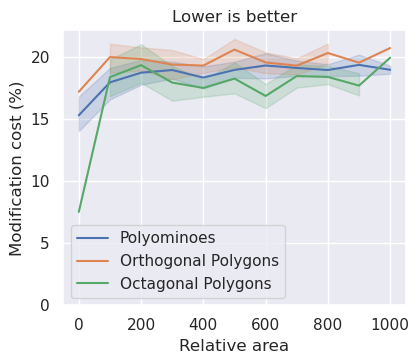

In [5]:
import seaborn as sns
sns.set_theme()
t = data.copy()
t.sort_values(by="instance_type", inplace=True)
t["x"] = t["relative_area"].apply(lambda x: 100*round(x/100))
t["y"] = 100*t["modification_cost"]
fig, ax = plt.subplots(figsize=(4.5,3.8))
sns.lineplot(data=t, x="x", y="y", hue="instance_type_simplified")#, style="instance_type")
plt.ylabel("Modification cost (%)")
plt.xlabel("Relative area")
plt.title("Lower is better")
plt.ylim(0, None)
plt.legend(ncol=1)
plt.tight_layout()
plt.savefig("./out/05_modification_cost.pdf")
plt.show()